In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Output')

library("readxl")
library(tidyverse)
library(reshape2)
library(ggrepel)
library(data.table)

#reading in file
data <- read_excel("CytokineData_102920.xlsx", sheet = 2)
data_df = data.frame(data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




# Simulation

Simulating or choosing 500 random concentrations from each compartment and running spearman correlation tests to see if correlation between compartments persists given random noise. 

In [2]:
#finding average protein concentration by compartment for non-smokers only
#these represent the real data
NLF_conc = data_df %>% 
    filter(Compartment == 'NLF', Group == 'NS') %>%
    group_by(Protein) %>%
    summarize(mean = mean(Conc_pslog2))
ELF_conc = data_df %>% 
    filter(Compartment == 'ELF', Group == 'NS') %>%
    group_by(Protein) %>%
    summarize(mean = mean(Conc_pslog2))
Sputum_conc = data_df %>% 
    filter(Compartment == 'Sputum', Group == 'NS') %>%
    group_by(Protein) %>%
    summarize(mean = mean(Conc_pslog2))
Serum_conc = data_df %>% 
    filter(Compartment == 'Serum', Group == 'NS') %>%
    group_by(Protein) %>%
    summarize(mean = mean(Conc_pslog2))

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



In [3]:
#need to get 22 cytokine values 500 times
#these represent simulated data
NLF_permutations = c()
ELF_permutations = c()
Sputum_permutations = c()
Serum_permutations = c()
number_of_permutations = 500
for (i in 1:number_of_permutations){
    #generating random concentrations
    NLF_random_conc = sample(NLF_conc$mean, replace = TRUE)
    ELF_random_conc = sample(ELF_conc$mean, replace = TRUE)
    Sputum_random_conc = sample(Sputum_conc$mean, replace = TRUE)
    Serum_random_conc = sample(Serum_conc$mean, replace = TRUE)
    
    #putting all iterations into a vector
    NLF_permutations = c(NLF_permutations, NLF_random_conc)
    ELF_permutations = c(ELF_permutations, ELF_random_conc)
    Sputum_permutations = c(Sputum_permutations, Sputum_random_conc)
    Serum_permutations = c(Serum_permutations, Serum_random_conc)
}

#changing dimensions where there are 22 cytokines (rows) and 500 perumutations (cols)
dim(NLF_permutations) = c(22,number_of_permutations)
dim(ELF_permutations) = c(22,number_of_permutations)
dim(Sputum_permutations) = c(22,number_of_permutations)
dim(Serum_permutations) = c(22,number_of_permutations)

# Spearman Correlations

In [4]:
#this is for real data
get_spearman_values = function(concentrations_comp1, concentrations_comp2){
    spearman_test = cor.test(concentrations_comp1, concentrations_comp2, method = c('spearman'))
    coeff = spearman_test$estimate
    pvalue = spearman_test$p.value
    value_tuple = c(coeff, pvalue)
    return(value_tuple)
}

#real data 
NLF_ELF_tuple_real = get_spearman_values(NLF_conc$mean, ELF_conc$mean)
NLF_Sputum_tuple_real = get_spearman_values(NLF_conc$mean, Sputum_conc$mean)
NLF_Serum_tuple_real = get_spearman_values(NLF_conc$mean, Serum_conc$mean)
ELF_Serum_tuple_real = get_spearman_values(ELF_conc$mean, Serum_conc$mean)
ELF_Sputum_tuple_real = get_spearman_values(ELF_conc$mean, Sputum_conc$mean)
Sputum_Serum_tuple_real = get_spearman_values(Sputum_conc$mean, Serum_conc$mean)

In [5]:
#this is for simulated data
get_spearman_values_looped_simulated = function(concentrations_comp1, concentrations_comp2){
    value_tuple_matrix = c()
    for (i in 1:number_of_permutations){
        spearman_test = cor.test(concentrations_comp1[,i], concentrations_comp2[,i], method = c('spearman'))
        coeff = spearman_test$estimate
        pvalue = spearman_test$p.value
        value_tuple = c(coeff, pvalue)
        value_tuple_matrix = rbind(value_tuple_matrix, value_tuple)
    }
    return(value_tuple_matrix)
}

# comparing simulated data across compartments
NLF_ELF_tuple_simulated = get_spearman_values_looped_simulated(NLF_permutations, ELF_permutations)
NLF_Sputum_tuple_simulated = get_spearman_values_looped_simulated(NLF_permutations, Sputum_permutations)
NLF_Serum_tuple_simulated = get_spearman_values_looped_simulated(NLF_permutations, Serum_permutations)
ELF_Serum_tuple_simulated = get_spearman_values_looped_simulated(ELF_permutations, Serum_permutations)
ELF_Sputum_tuple_simulated = get_spearman_values_looped_simulated(ELF_permutations, Sputum_permutations)
Sputum_Serum_tuple_simulated = get_spearman_values_looped_simulated(Sputum_permutations, Serum_permutations)

Warning message in cor.test.default(concentrations_comp1[, i], concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1[, i], concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1[, i], concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1[, i], concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1[, i], concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1[, i], concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1[, i], concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1[, i], concentrations_comp2[, :
“Cannot c

In [6]:
#this is for real and simulated data
get_spearman_values_looped_both = function(concentrations_comp1, concentrations_comp2){
    value_tuple_matrix = c()
    for (i in 1:number_of_permutations){
        spearman_test = cor.test(concentrations_comp1, concentrations_comp2[,i], method = c('spearman'))
        coeff = spearman_test$estimate
        pvalue = spearman_test$p.value
        value_tuple = c(coeff, pvalue)
        value_tuple_matrix = rbind(value_tuple_matrix, value_tuple)
    }
    return(value_tuple_matrix)
}

#comparing simulated data across compartments
#version 1 (v1 has the first df as real and the second simulated vice versa for v2)
NLF_ELF_tuple_real_simulated = get_spearman_values_looped_both(NLF_conc$mean, ELF_permutations)
NLF_Sputum_tuple_real_simulated = get_spearman_values_looped_both(NLF_conc$mean, Sputum_permutations)
NLF_Serum_tuple_real_simulated = get_spearman_values_looped_both(NLF_conc$mean, Serum_permutations)
ELF_Serum_tuple_real_simulated = get_spearman_values_looped_both(ELF_conc$mean, Serum_permutations)
ELF_Sputum_tuple_real_simulated = get_spearman_values_looped_both(ELF_conc$mean, Sputum_permutations)
Sputum_Serum_tuple_real_simulated = get_spearman_values_looped_both(Sputum_conc$mean, Serum_permutations)

#version 2
NLF_ELF_tuple_simulated_real = get_spearman_values_looped_both(ELF_conc$mean, NLF_permutations)
NLF_Sputum_tuple_simulated_real = get_spearman_values_looped_both(Sputum_conc$mean, NLF_permutations)
NLF_Serum_tuple_simulated_real = get_spearman_values_looped_both(Serum_conc$mean, NLF_permutations)
ELF_Serum_tuple_simulated_real = get_spearman_values_looped_both(Serum_conc$mean, ELF_permutations)
ELF_Sputum_tuple_simulated_real = get_spearman_values_looped_both(Sputum_conc$mean, ELF_permutations)
Sputum_Serum_tuple_simulated_real = get_spearman_values_looped_both(Serum_conc$mean, Sputum_permutations)

#comparing real vs. simulated data within compartments
NLF_NLF_tuple_real_simulated = get_spearman_values_looped_both(NLF_conc$mean, NLF_permutations)
ELF_ELF_tuple_real_simulated = get_spearman_values_looped_both(ELF_conc$mean, ELF_permutations)
Sputum_Sputum_tuple_real_simulated = get_spearman_values_looped_both(Sputum_conc$mean, Sputum_permutations)
Serum_Serum_tuple_real_simulated = get_spearman_values_looped_both(Sputum_conc$mean, Serum_permutations)

Warning message in cor.test.default(concentrations_comp1, concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning message in cor.test.default(concentrations_comp1, concentrations_comp2[, :
“Cannot compute exact p-value with ties”
Warning 

In [7]:
# creating table w/ comparisons as rows and 3 col: coeff, p value, real or simulated data
table_summary_across_comp = function(tuple1, tuple2, tuple3, tuple4, tuple5, tuple6, data_type){
    table_initial = rbind(tuple1, tuple2, tuple3, tuple4, tuple5, tuple6) #contains coeff, p values
    compartment_comparison_vector = c('NLF_ELF', 'NLF_Sputum','NLF_Serum','ELF_Sputum','ELF_Serum','Sputum_Serum')
    data_type_vector = rep(data_type, times = length(table_initial[,1])) #contains the type of values
    
    spearman_table = cbind(compartment_comparison_vector, table_initial, data_type_vector) #creating table
    colnames(spearman_table) = c('Compartment_Comparison','Spearman_Coefficient', 'P_Value', 'Data_Type')
    return(spearman_table)
}

#putting everything into a table
real_correlations = table_summary_across_comp(NLF_ELF_tuple_real, NLF_Sputum_tuple_real, NLF_Serum_tuple_real, ELF_Serum_tuple_real, 
             ELF_Sputum_tuple_real, Sputum_Serum_tuple_real, 'Real')
simulated_correlations = table_summary_across_comp(NLF_ELF_tuple_simulated, NLF_Sputum_tuple_simulated, NLF_Serum_tuple_simulated, ELF_Serum_tuple_simulated, 
             ELF_Sputum_tuple_simulated, Sputum_Serum_tuple_simulated, 'Simulated')
real_simulated_correlations = table_summary_across_comp(NLF_ELF_tuple_real_simulated, NLF_Sputum_tuple_real_simulated, NLF_Serum_tuple_real_simulated, ELF_Serum_tuple_real_simulated, 
             ELF_Sputum_tuple_real_simulated, Sputum_Serum_tuple_real_simulated, 'Real & Simulated')
simulated_real_correlations = table_summary_across_comp(NLF_ELF_tuple_simulated_real, NLF_Sputum_tuple_simulated_real, NLF_Serum_tuple_simulated_real, ELF_Serum_tuple_simulated_real, 
             ELF_Sputum_tuple_simulated_real, Sputum_Serum_tuple_simulated_real, 'Simulated & Real')

In [8]:
table_summary_within_comp = function(tuple1, tuple2, tuple3, tuple4, data_type){
    table_initial = rbind(tuple1, tuple2, tuple3, tuple4) #contains coeff, p values
    compartment_comparison_vector = c('NLF_NLF', 'ELF_ELF','Sputum_Sputum','Serum_Serum')
    data_type_vector = rep(data_type, times = length(table_initial[,1])) #contains the type of values
    spearman_table = cbind(compartment_comparison_vector, table_initial, data_type_vector) #creating table
    colnames(spearman_table) = c('Compartment_Comparison','Spearman_Coefficient', 'P_Value', 'Data_Type')
    return(spearman_table)
}
#putting everything into a table
real_correlations_within_comp = table_summary_within_comp(NLF_NLF_tuple_real_simulated, ELF_ELF_tuple_real_simulated, 
                                                          Sputum_Sputum_tuple_real_simulated, Serum_Serum_tuple_real_simulated, 
                                                          'Real & Simulated Within')

In [9]:
final_correlation_table = data.frame(rbind(real_correlations, simulated_correlations, real_simulated_correlations,
                                          simulated_real_correlations, real_correlations_within_comp))

#making coefficients and p values numeric
final_correlation_table$Spearman_Coefficient = as.numeric(final_correlation_table$Spearman_Coefficient)
final_correlation_table$P_Value = as.numeric(final_correlation_table$P_Value)

#removing negative spearman_coefficients and p values that aren't statistically significant (p > 0.05)
final_correlation_table = final_correlation_table %>% 
    filter(Spearman_Coefficient > 0.5, P_Value < 0.05)

# Plot

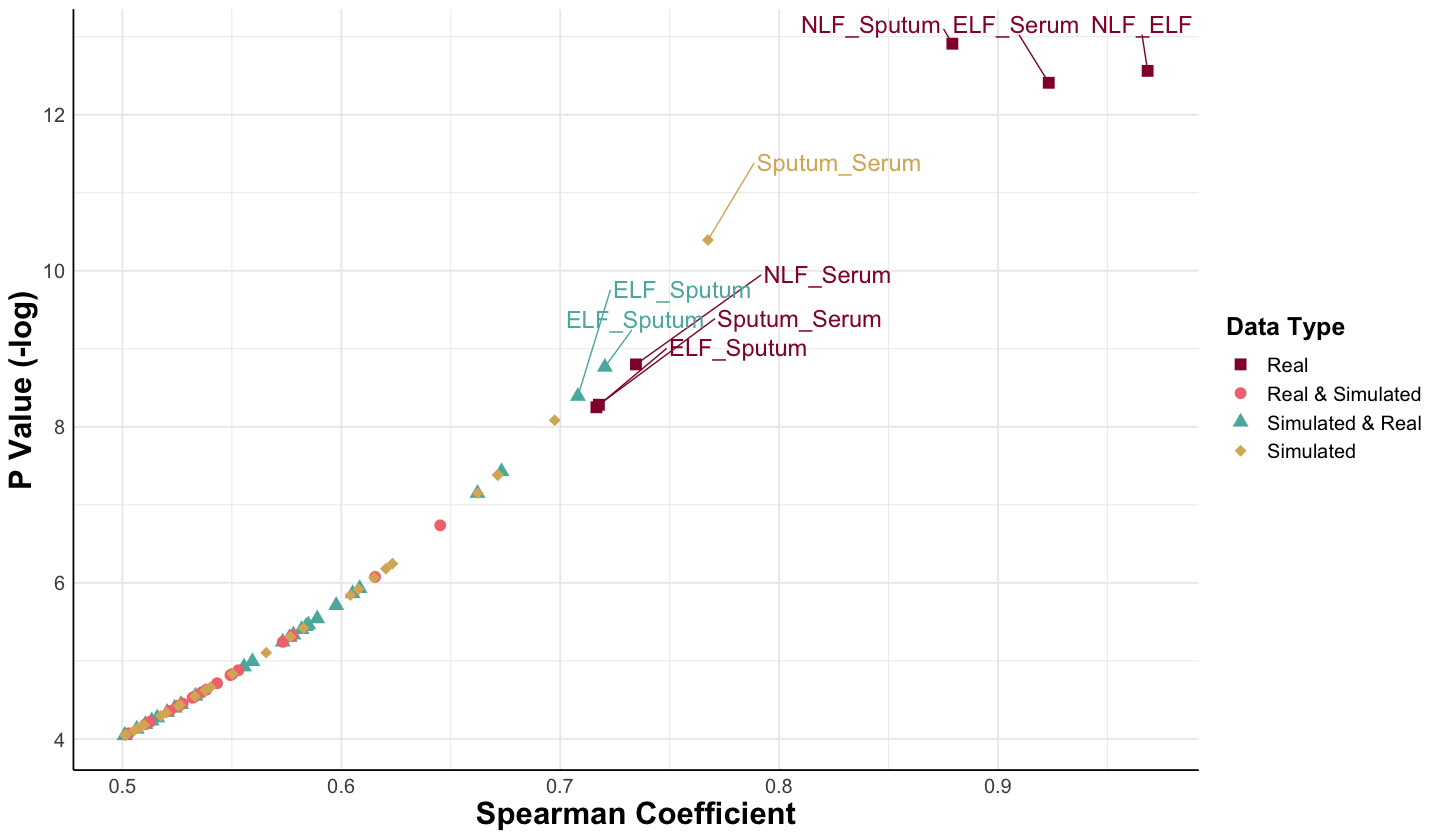

In [47]:
options(repr.plot.width= 12, repr.plot.height= 7) #changing size
ggplot() + 
  geom_point(data = final_correlation_table %>% #removed this because this a within compartment comparison
             filter(Data_Type != 'Real & Simulated Within'), aes(x = Spearman_Coefficient, y = -log(P_Value), 
                                                                shape = Data_Type, color = Data_Type), size = 3) +
  geom_text_repel(data = final_correlation_table %>% filter(Spearman_Coefficient > 0.7), #labeling points with coeff > 0.7
    nudge_y = 1,
    nudge_x = 0.06,
    segment.size = 0.4,
    size = 5, 
    show.legend = FALSE, 
    aes(x = Spearman_Coefficient, y = -log(P_Value), label = Compartment_Comparison, color = Data_Type)) +

  theme_minimal() + 
  
  theme(#axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12),
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face="bold", size = 15),
        legend.text = element_text(size = 12))+ #changes legend title
  xlab('Spearman Coefficient') + ylab('P Value (-log)') + #changing axis labels 

  scale_color_manual(name = 'Data Type',
                      values = c('#93003a','#f4777f','#5ab4ac','#d8b365'),
                      labels = c('Real','Real & Simulated','Simulated & Real','Simulated')) + #reordering
  scale_shape_manual(name = 'Data Type',
                     values = c(15,16,17,18),
                     labels = c('Real','Real & Simulated','Simulated & Real','Simulated'))

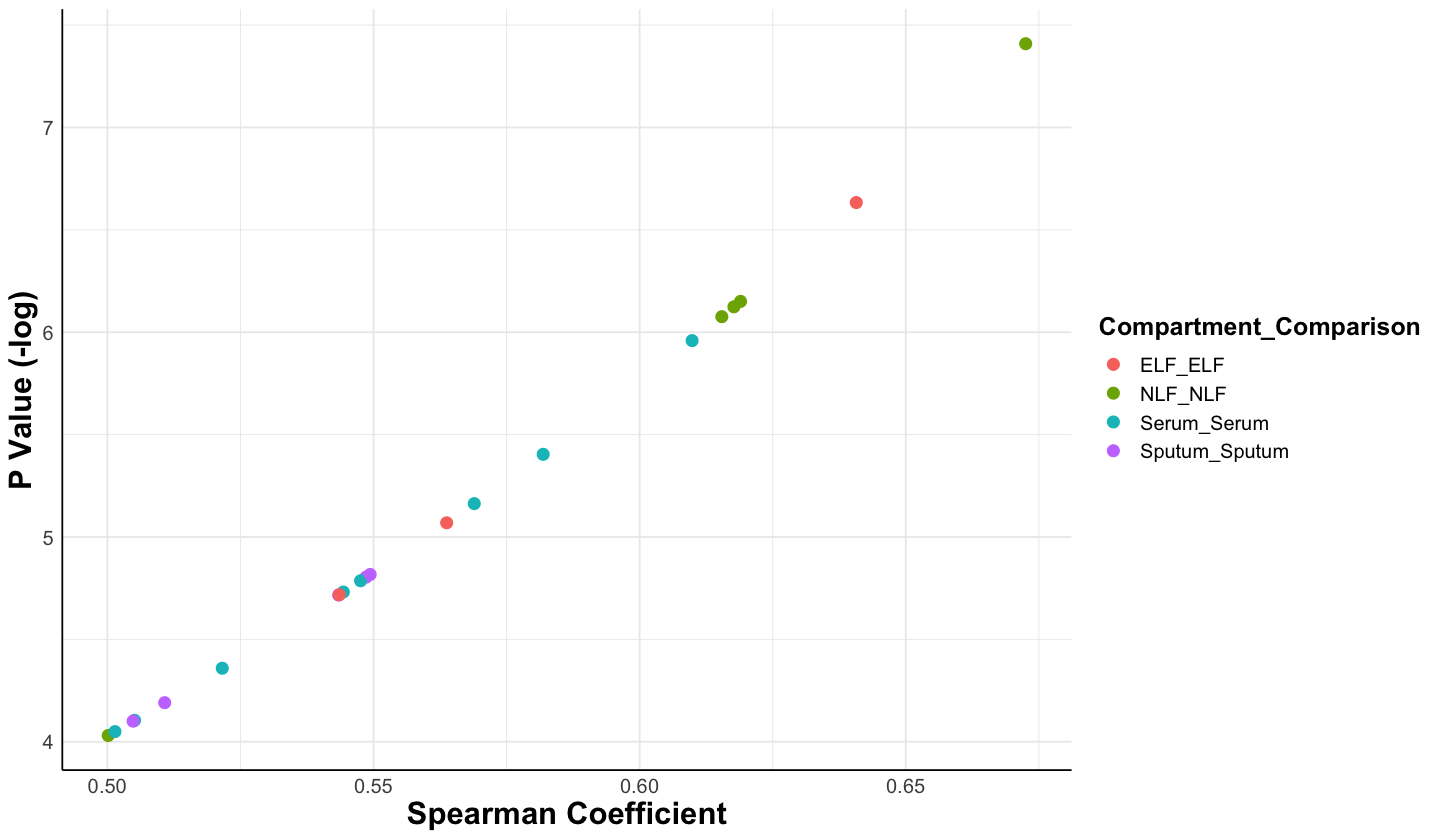

In [52]:
#plotting within compartment comparisons separately
options(repr.plot.width= 12, repr.plot.height= 7) #changing size
ggplot() + 
  geom_point(data = final_correlation_table %>% #removed this because this a within compartment comparison
             filter(Data_Type == 'Real & Simulated Within'), aes(x = Spearman_Coefficient, y = -log(P_Value), 
                                                                color = Compartment_Comparison), size = 3) +
#   geom_text_repel(data = final_correlation_table %>% filter(Spearman_Coefficient > 0.7), #labeling points with coeff > 0.7
#     nudge_y = 1,
#     nudge_x = 0.06,
#     segment.size = 0.4,
#     size = 5, 
#     show.legend = FALSE, 
#     aes(x = Spearman_Coefficient, y = -log(P_Value), label = Compartment_Comparison, color = Data_Type)) +

  theme_minimal() + 
  
  theme(#axis.text.x = element_text(angle = 90, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour="black"), #making x and y axes black
        axis.text = element_text(size = 12),
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.title = element_text(face="bold", size = 15),
        legend.text = element_text(size = 12))+ #changes legend title
  xlab('Spearman Coefficient') + ylab('P Value (-log)') #+ #changing axis labels 

#   scale_color_manual(name = 'Data Type',
#                       values = c('#93003a'),
#                       labels = c('Real & Simulated Within')) + #reordering
#   scale_shape_manual(name = 'Data Type',
#                      values = c(15),
#                      labels = c('Real & Simulated Within'))

In [19]:
head(final_correlation_table %>% filter(Data_Type == 'Real & Simulated Within'))

,Compartment_Comparison,Spearman_Coefficient,P_Value,Data_Type
,<chr>,<dbl>,<dbl>,<chr>
value_tuple.9000,NLF_NLF,0.18955979,0.3981585,Real & Simulated Within
value_tuple.9002,Sputum_Sputum,0.06457126,0.7752726,Real & Simulated Within
value_tuple.9005,ELF_ELF,0.16879153,0.4527116,Real & Simulated Within
value_tuple.9006,Sputum_Sputum,0.23070422,0.3016258,Real & Simulated Within
value_tuple.9012,NLF_NLF,0.24561466,0.2705600,Real & Simulated Within
value_tuple.9013,ELF_ELF,0.06288988,0.7809846,Real & Simulated Within
